# 🌳 Decision Tree vs 🌲 Random Forest (Wine Dataset)

Comparação prática em classificação com o dataset **Wine** do scikit-learn.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1) Carregar dataset Wine

In [7]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Classes:", wine.target_names)
print("Shape treino:", X_train.shape, "| Shape teste:", X_test.shape)

Classes: ['class_0' 'class_1' 'class_2']
Shape treino: (124, 13) | Shape teste: (54, 13)


## 2) Decision Tree Classifier (rasa)

In [11]:
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("--- Decision Tree ---")
print("Acurácia:", accuracy_score(y_test, y_pred_dt))
print("\nRelatório:\n", classification_report(y_test, y_pred_dt, target_names=wine.target_names))

--- Decision Tree ---
Acurácia: 0.8703703703703703

Relatório:
               precision    recall  f1-score   support

     class_0       0.75      0.95      0.84        19
     class_1       0.94      0.76      0.84        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.87        54
   macro avg       0.90      0.88      0.88        54
weighted avg       0.89      0.87      0.87        54



## 3) Random Forest Classifier

In [9]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("--- Random Forest ---")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório:\n", classification_report(y_test, y_pred_rf, target_names=wine.target_names))

--- Random Forest ---
Acurácia: 1.0

Relatório:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## 4) Comparando as matrizes de confusão

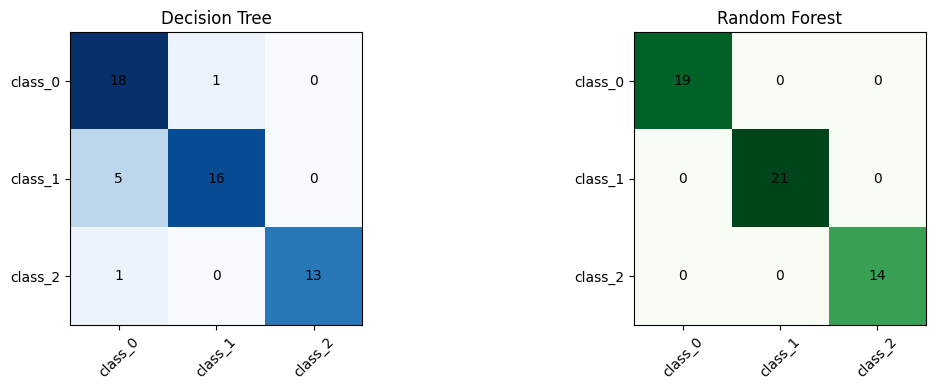

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
axes[0].imshow(cm_dt, cmap="Blues")
axes[0].set_title("Decision Tree")
axes[0].set_xticks(range(len(wine.target_names)))
axes[0].set_yticks(range(len(wine.target_names)))
axes[0].set_xticklabels(wine.target_names, rotation=45)
axes[0].set_yticklabels(wine.target_names)
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        axes[0].text(j, i, cm_dt[i, j], ha="center", va="center", color="black")

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
axes[1].imshow(cm_rf, cmap="Greens")
axes[1].set_title("Random Forest")
axes[1].set_xticks(range(len(wine.target_names)))
axes[1].set_yticks(range(len(wine.target_names)))
axes[1].set_xticklabels(wine.target_names, rotation=45)
axes[1].set_yticklabels(wine.target_names)
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        axes[1].text(j, i, cm_rf[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

# Importância das features (impureza Gini)


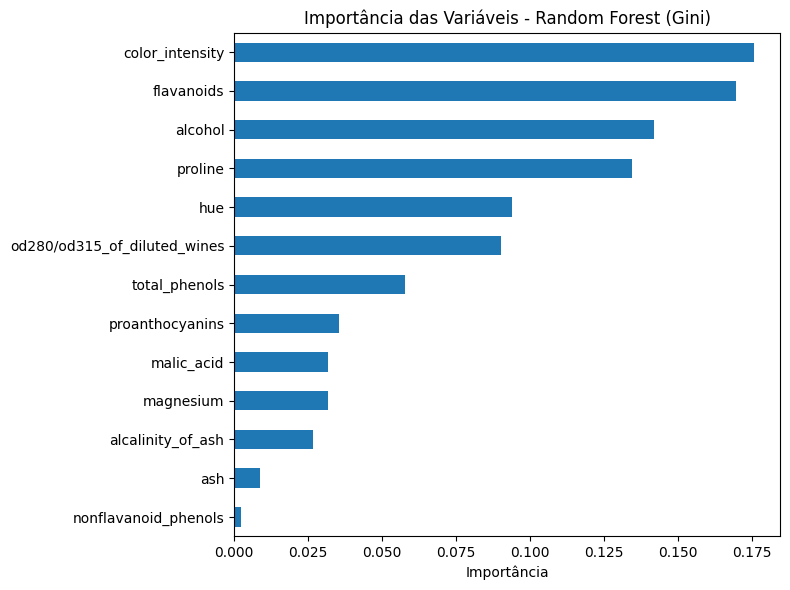

color_intensity    0.175594
flavanoids         0.169674
alcohol            0.141834
proline            0.134507
hue                0.093916
dtype: float64

In [13]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=wine.feature_names).sort_values()

plt.figure(figsize=(8,6))
feat_importances.plot(kind="barh")
plt.title("Importância das Variáveis - Random Forest (Gini)")
plt.xlabel("Importância")
plt.tight_layout()
plt.show()

# Mostrar top 5 em tabela
feat_importances.sort_values(ascending=False).head(5)